Fourier space solution to radial hamiltonians with local square well and Woods-Saxon potentials 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy import integrate

In [149]:
#constants
hbar= 1.
mass = 1.
L = 16.
oam = 0
V0 = 80
R0 = 4
a0 = 0.6
n_max = 50
r_dim = 100
# n_space = 1+np.arange(nmax)
n_space = np.arange(n_max)
r_space = np.linspace(0,L,r_dim)

In [150]:
def basis(r,n):
    y = np.sin((n+1)*np.pi*r/L)
    return np.sqrt(2/L)*y

def KE(n):
    z = hbar*np.pi*n/L
    return 0.5*z*z/mass

def KErot(m,n,l):
    z = hbar*hbar*l*(l+1)*np.pi*np.pi*0.5/(mass*L*L)
    return z*min(m,n)

def square_well(r,r0,v0):
    v = np.zeros(r.shape)
    v[r<r0] = -v0
    return v

def woods_saxon(r,r0,v0,a0):
    v = - v0 / (1 + np.exp((r - r0)/a0))
    return v

def inner_product(x,y,space):
    return integrate.simps(x*y,space)
    
def square_well_int(m,n,r0,v0):
    return inner_product(basis(r_space,m),square_well(r_space,r0,v0)*basis(r_space,n),r_space)
    
def woods_saxon_int(m,n,r0,v0,a0):
    return inner_product(basis(r_space,m),woods_saxon(r_space,r0,v0,a0)*basis(r_space,n),r_space)
    
def fourier_to_coord(wfn_f):
    wfn_r = np.sum([wfn_f[k]*basis(r_space,k) for k in n_space],axis=0)
    return wfn_r

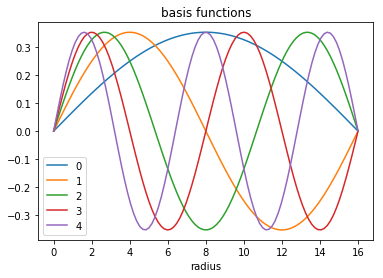

In [151]:
leg = []
for k in range(5):
    plt.plot(r_space,basis(r_space,k))
    leg += [k]
plt.legend(leg)
plt.xlabel('radius')
plt.title('basis functions')
plt.show()

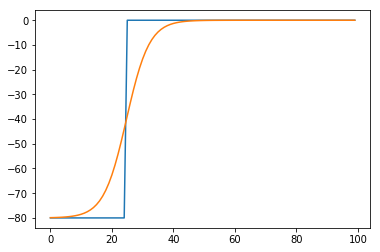

In [152]:
plt.plot(square_well(r_space,R0,V0))
plt.plot(woods_saxon(r_space,R0,V0,a0))
plt.show()

In [153]:
T = np.diag(KE(n_space))
V_square_well = np.zeros((n_max,n_max))
V_woods_saxon = np.zeros((n_max,n_max))
Trot = np.zeros((n_max,n_max))
for i in range(n_max):
    for j in range(n_max):
        V_square_well[i,j] = square_well_int(i,j,R0,V0)
        V_woods_saxon[i,j] = woods_saxon_int(i,j,R0,V0,a0)
for i in range(n_max):
    for j in range(n_max):
        Trot[i,j] = KErot(i,j,oam)
H_square_well = T + Trot + V_square_well
H_woods_saxon = T + Trot + V_woods_saxon


In [169]:
def eigensolve(H,n_keep = 20):
    evals,evecs = la.eig(H)
    idx = evals.argsort()[::-1]   
    idx = np.flipud(idx)
    evals = evals[idx]
    evecs = evecs[:,idx]
    return evals[:n_keep], evecs[:,:n_keep]

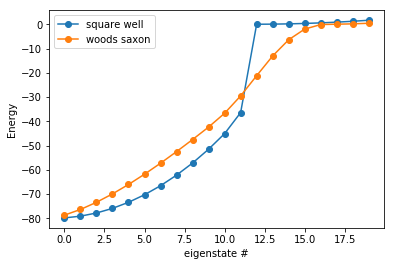

# SW bound states = 12
# WS bound states = 17


In [171]:
evals_sw, evecs_sw = eigensolve(H_square_well)
evals_ws, evecs_ws = eigensolve(H_woods_saxon)
plt.plot(evals_sw,'-o')
plt.plot(evals_ws,'-o')
plt.ylabel('Energy')
plt.xlabel('eigenstate #')
plt.legend(['square well','woods saxon'])
plt.show()
print("# SW bound states = %i" % len(evals_sw[evals_sw<0]))
print("# WS bound states = %i" % len(evals_ws[evals_ws<0]))

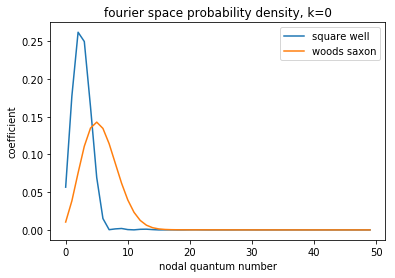

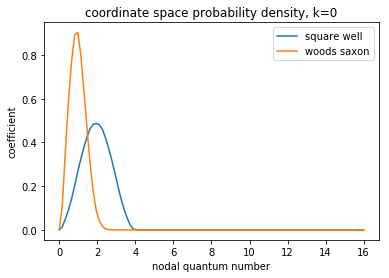

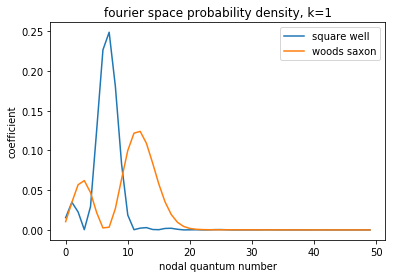

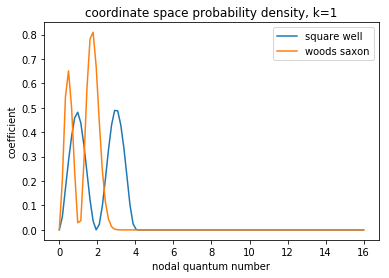

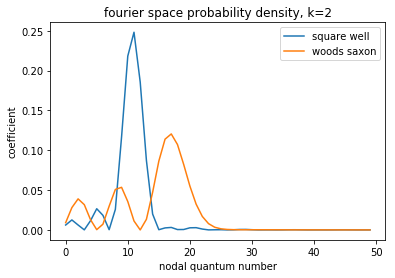

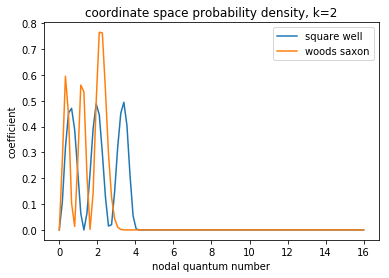

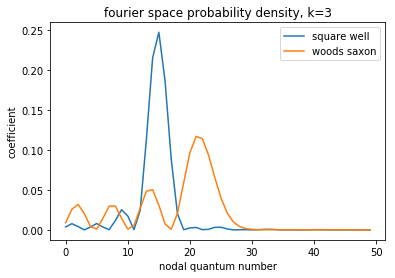

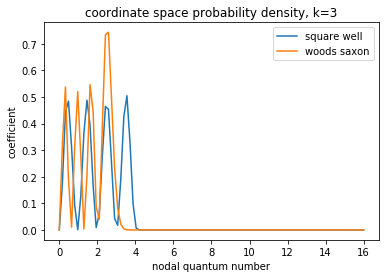

In [175]:
def compare_fourier_wfn(k):
    plt.plot(n_space,evecs_sw[:,k]**2)
    plt.plot(n_space,evecs_ws[:,k]**2)
    plt.title('fourier space probability density, k=%i' %k)
    plt.xlabel('nodal quantum number')
    plt.ylabel('coefficient')
    plt.legend(['square well','woods saxon'])
    plt.show()
def compare_coordinate_wfn(k):
    plt.plot(r_space,fourier_to_coord(evecs_sw[:,k])**2)
    plt.plot(r_space,fourier_to_coord(evecs_ws[:,k])**2)
    plt.title('coordinate space probability density, k=%i' %k)
    plt.xlabel('nodal quantum number')
    plt.ylabel('coefficient')
    plt.legend(['square well','woods saxon'])
    plt.show()

    
for k in range(4):
    compare_fourier_wfn(k)
    compare_coordinate_wfn(k)